In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
file = 'S02-hw-dataset.csv'
data = pd.read_csv(file,sep=',')
data

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [103]:
#Первичный осмотр, выведем 5 первых строчек
print(data.head())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296


In [104]:
#Информация о данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


In [105]:
#Описательная статистика 
print(data.describe())

         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000   24.000000   3.000000   432.000000
50%    20.000000   33.000000   5.000000   693.000000
75%    30.000000   45.500000   7.000000  1115.000000
max    40.000000  120.000000  11.000000  2475.000000


In [106]:
#Выведем долю пропусков столбцов в процентах
missing_percent = data.isna().mean() * 100
print(missing_percent)

user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64


In [107]:
print("Всего строк:",len(data))
print("Всего дубликатов:",data.duplicated().sum())
print("Дублирующиеся строки:")
print(data[data.duplicated(keep=False)])

Всего строк: 41
Всего дубликатов: 1
Дублирующиеся строки:
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


In [108]:
#Отрицательные значения в purchases
negative_purchases = data[data['purchases'] < 0]
if not negative_purchases.empty:
    print(f"Найдено записей: {len(negative_purchases)}")
    print(negative_purchases[['user_id', 'age', 'country', 'purchases', 'revenue']])
else:
    print("Отрицательных значений не найдено")

Найдено записей: 1
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [109]:
# Пропуски
missing = data[data['age'].isna()]
print(f"Пропуски: {len(missing)}")
if len(missing) > 0:
    print(missing[['user_id', 'age', 'country', 'purchases', 'revenue']])

# Нереалистичные значения <10 лет и >100 лет
suspicious = data[data['age'].notna() & ((data['age'] < 10) | (data['age'] > 100))]
print(f"\nНереалистичные значения (<10 или >100): {len(suspicious)}")
if len(suspicious) > 0:
    print(suspicious[['user_id', 'age', 'country', 'purchases', 'revenue']])

Пропуски: 2
    user_id  age country  purchases  revenue
4         5  NaN      DE          6     1296
12       13  NaN      US          9      630

Нереалистичные значения (<10 или >100): 2
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
20       21    5.0      RU          8     1488


In [110]:
print("Минимальный возраст:", data['age'].min())
print("Максимальный возраст:", data['age'].max())
print("Медиана возраста:", data['age'].median())

Минимальный возраст: 5.0
Максимальный возраст: 120.0
Медиана возраста: 33.0


In [111]:
#Нулевой доход при ненулевых покупках

zero_revenue_issue = data[(data['revenue'] == 0) & (data['purchases'] > 0)]
if not zero_revenue_issue.empty:
    print(f"Найдено записей: {len(zero_revenue_issue)}")
    print(zero_revenue_issue[['user_id', 'age', 'country', 'purchases', 'revenue']])
else:
    print("Не найдено")

Найдено записей: 1
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


In [112]:
print("1. Пропуски в данных: в столбце 'age' есть 2 пропущенных значения (5% от всех данных)")
print("2. Дубликаты: найден 1 полный дубликат строки (user_id=10)")
print("3. Подозрительные значения:")
print("- Отрицательное значение purchases (-1) у user_id=6")
print("- Нереалистичные значения возраста: 120 лет (user_id=6) и 5 лет (user_id=21)")
print("- Нулевой revenue при ненулевых purchases: 2 записи (user_id=11 и user_id=18)")

1. Пропуски в данных: в столбце 'age' есть 2 пропущенных значения (5% от всех данных)
2. Дубликаты: найден 1 полный дубликат строки (user_id=10)
3. Подозрительные значения:
- Отрицательное значение purchases (-1) у user_id=6
- Нереалистичные значения возраста: 120 лет (user_id=6) и 5 лет (user_id=21)
- Нулевой revenue при ненулевых purchases: 2 записи (user_id=11 и user_id=18)


In [113]:
#Распределение по странам
country_distribution = data['country'].value_counts()
print(country_distribution)

print(f"\nВсего уникальных стран: {data['country'].nunique()}")

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Всего уникальных стран: 5


In [114]:
#Средне медианные значения по странам
gr_country = data.groupby('country')
gr_country.median()

,user_id,age,purchases,revenue
country,,,,
CN,10.0,24.0,4.5,1054.0
DE,27.0,35.0,6.0,1200.0
FR,19.5,42.0,6.0,619.5
RU,19.0,26.0,6.0,650.0
US,24.5,39.0,4.0,537.5


In [115]:
# Группировка по странам 
country_analysis = data.groupby('country').agg({
    'user_id': 'count',  # Количество пользователей
    'age': ['mean', 'median'],  # Статистики по возрасту
    'purchases': ['sum', 'mean', 'max', 'min'],  # Статистики по покупкам
    'revenue': ['sum', 'mean', 'max', 'min']  # Статистики по доходу
})

# Выводим результат без переименования
print("Группировка по странам")
print(country_analysis)

Группировка по странам
        user_id        age        purchases                   revenue  \
          count       mean median       sum      mean max min     sum   
country                                                                 
CN            2  24.000000   24.0         9  4.500000   7   2    2108   
DE            6  34.600000   35.0        39  6.500000  11   3    8673   
FR           12  46.250000   42.0        51  4.250000   7  -1    8111   
RU           13  30.076923   26.0        62  4.769231   8   0   10271   
US            8  36.714286   39.0        37  4.625000   9   3    4459   

                                 
                mean   max  min  
country                          
CN       1054.000000  1652  456  
DE       1445.500000  2475  702  
FR        675.916667  1608    0  
RU        790.076923  2086    0  
US        557.375000   980    0  


In [116]:
# Создаем возрастные группы
data['age_group'] = pd.cut(
    data['age'],
    bins=[0, 20, 30, 40, 50, 100],
    labels=['<20', '20-29', '30-39', '40-49', '50+'],
    right=False
)

# Группировка по возрастным группам
age_group_analysis = data.groupby('age_group',observed=False).agg({
    'user_id': 'count',
    'age': 'mean',
    'purchases': ['sum', 'mean'],
    'revenue': ['sum', 'mean']
})

print("Группировка по возрастным группам:")
print(age_group_analysis)

Группировка по возрастным группам:
          user_id        age purchases           revenue             
            count       mean       sum      mean     sum         mean
age_group                                                            
<20             2  11.500000        12  6.000000    2592  1296.000000
20-29          13  24.076923        58  4.461538    7352   565.538462
30-39          11  34.272727        66  6.000000   13379  1216.272727
40-49           6  45.000000        18  3.000000    4008   668.000000
50+             6  53.500000        30  5.000000    3580   596.666667


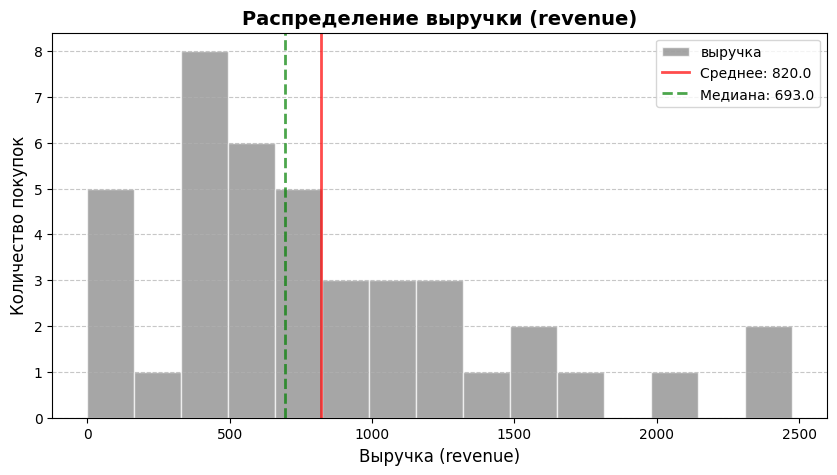

In [ ]:
fig, ax = plt.subplots(
    figsize =(10, 5)
)

ax.hist(
    data['revenue'],
    label='выручка',
    bins = 15,
    color = 'grey',
    edgecolor= 'white',
    alpha = 0.7
)
# Настраиваем подписи и заголовок
ax.set_title('Распределение выручки (revenue)', fontsize=14, fontweight='bold')
ax.set_xlabel('Выручка (revenue)', fontsize=12)
ax.set_ylabel('Количество покупок', fontsize=12)

#Добавляем сетку
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем вертикальные линии для среднего и медианы
mean_revenue = data['revenue'].mean()
median_revenue = data['revenue'].median()

ax.axvline(mean_revenue, color='red', linestyle='-', linewidth=2, 
           alpha=0.7, label=f'Среднее: {mean_revenue:.1f}')
ax.axvline(median_revenue, color='green', linestyle='--', linewidth=2, 
           alpha=0.7, label=f'Медиана: {median_revenue:.1f}')


ax.legend()

fig.savefig('figures/histogram_rev_to_pur')
plt.show()

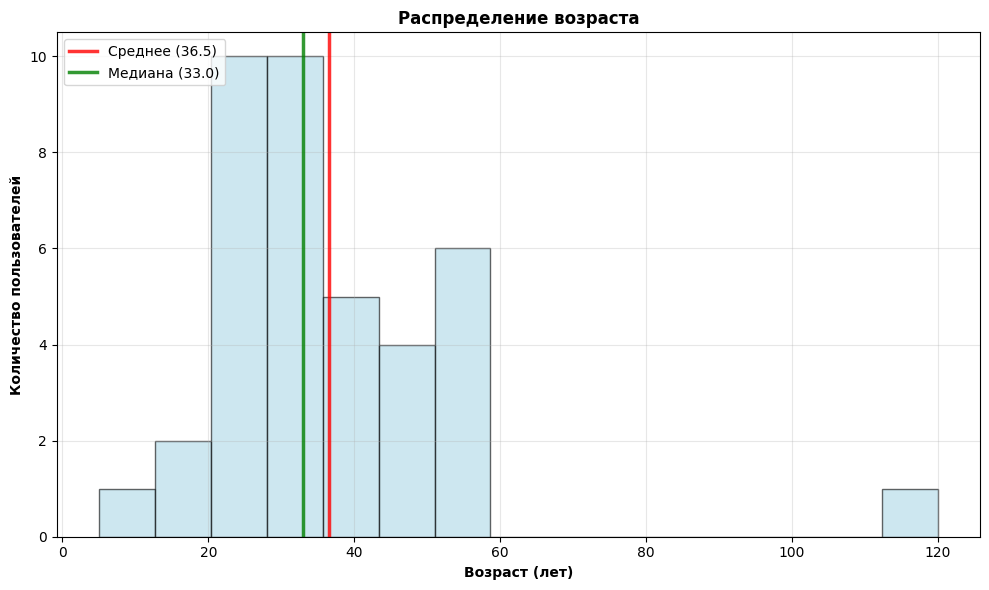

In [118]:
plt.figure(figsize=(10, 6))

# Данные и статистики
age_data = data['age'].dropna()
mean_age, median_age = age_data.mean(), age_data.median()

# Гистограмма
plt.hist(age_data, bins=15, edgecolor='black', alpha=0.6, color='lightblue')

# Линии статистик
plt.axvline(mean_age, color='red', linewidth=2.5, alpha=0.8, 
            label=f'Среднее ({mean_age:.1f})')
plt.axvline(median_age, color='green', linewidth=2.5, alpha=0.8, 
            label=f'Медиана ({median_age:.1f})')



# Настройки
plt.xlabel('Возраст (лет)', fontweight='bold')
plt.ylabel('Количество пользователей', fontweight='bold')
plt.title('Распределение возраста', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

# Сохраняем
fig.savefig('figures/histogram_age')
plt.show()

<Figure size 1000x600 with 0 Axes>

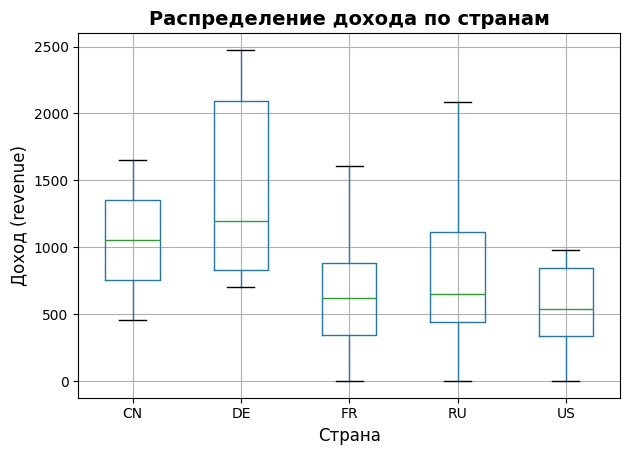

In [119]:
plt.figure(figsize=(10, 6))
data.boxplot(column='revenue', by='country', grid=True)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Доход (revenue)', fontsize=12)
plt.title('Распределение дохода по странам', fontsize=14, fontweight='bold')
plt.suptitle('')  # Убираем автоматический заголовок
plt.tight_layout()
fig.savefig('figures/boxsplot')
plt.show()

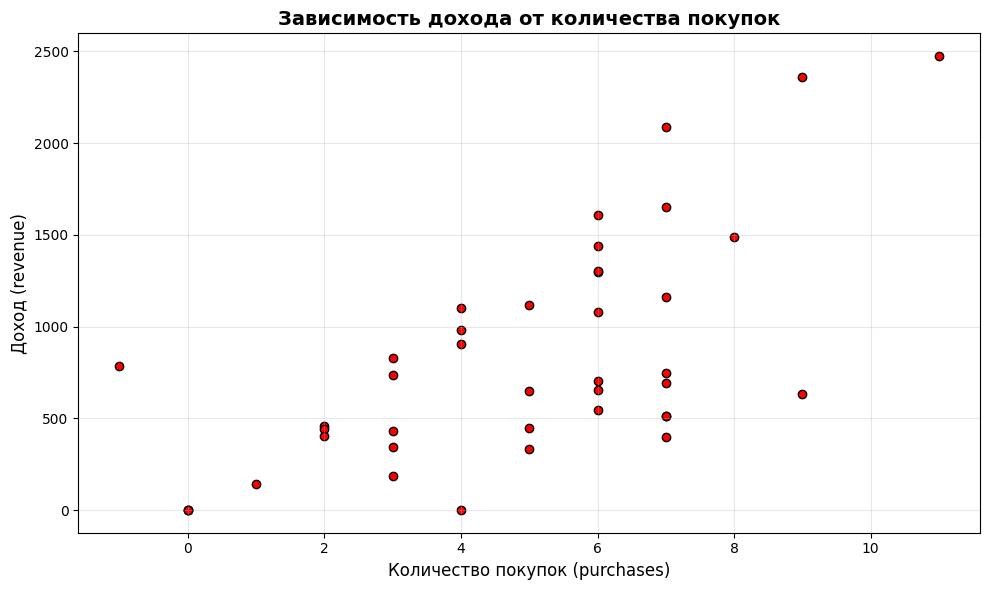

In [120]:
plt.figure(figsize=(10, 6))
plt.scatter(data['purchases'], data['revenue'], alpha=1, color='red', edgecolor='black')
plt.xlabel('Количество покупок (purchases)', fontsize=12)
plt.ylabel('Доход (revenue)', fontsize=12)
plt.title('Зависимость дохода от количества покупок', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
fig.savefig('figures/scatter_plot')
plt.show()